In [2]:
# DTWの勉強をしたファイル

In [3]:
import numpy as np
import pylab as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from tslearn.metrics import dtw_path

In [5]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/DTW/data/sample/data.csv", usecols=[1], header=None, encoding="shift-jis").values
input_data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/DTW/data/sample/input_data.csv", usecols=[1], header=None, encoding="shift-jis").values

No handles with labels found to put in legend.


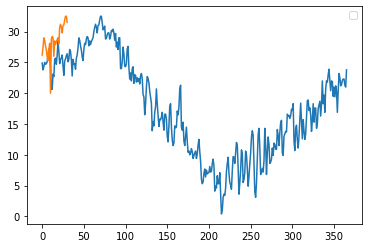

In [6]:
# plt.plot(data, label="wakayama")
plt.plot(data)
# plt.plot(input_data, label="input")
plt.plot(input_data)
plt.legend()
plt.show()

In [22]:
# DTWと動的計画法の勉強
# 練習のために同じ長さの時系列データX,Yを用意
# 各フレーム間の距離を並べた行列は以下のようなもの（距離は二乗距離）
# X = data[120:130]
# Y = input_data[:10]

X = data[120:130]
Y = input_data[:15]

In [23]:
print("X: " + str(len(X)))
print("Y: " + str(len(Y)))

X: 10
Y: 15


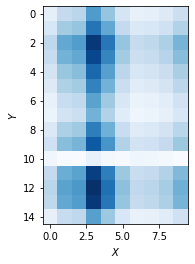

In [24]:
# 二乗距離を計算
# Xは値が１行で，Yは値が１列で並んでおり，配列同士の演算を行う
# 足りない行or列を補完するため，全ての組み合わせにおいて計算を行う
D = (np.array(X).reshape(1,-1) - np.array(Y).reshape(-1,1))**2
plt.imshow(D,cmap="Blues")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

In [25]:
np.array(X).reshape(1,-1)

array([[22.4, 19.8, 19.4, 16.5, 18.2, 21. , 22.7, 22.4, 21.7, 20.3]])

In [26]:
np.array(Y).reshape(-1,1)

array([[26.2],
       [27.4],
       [29. ],
       [28.6],
       [27.7],
       [27. ],
       [25.9],
       [25.3],
       [27.1],
       [28.1],
       [20. ],
       [28.8],
       [29.2],
       [29. ],
       [26. ]])

In [27]:
np.array(X).reshape(1,-1) - np.array(Y).reshape(-1,1)

array([[ -3.8,  -6.4,  -6.8,  -9.7,  -8. ,  -5.2,  -3.5,  -3.8,  -4.5,
         -5.9],
       [ -5. ,  -7.6,  -8. , -10.9,  -9.2,  -6.4,  -4.7,  -5. ,  -5.7,
         -7.1],
       [ -6.6,  -9.2,  -9.6, -12.5, -10.8,  -8. ,  -6.3,  -6.6,  -7.3,
         -8.7],
       [ -6.2,  -8.8,  -9.2, -12.1, -10.4,  -7.6,  -5.9,  -6.2,  -6.9,
         -8.3],
       [ -5.3,  -7.9,  -8.3, -11.2,  -9.5,  -6.7,  -5. ,  -5.3,  -6. ,
         -7.4],
       [ -4.6,  -7.2,  -7.6, -10.5,  -8.8,  -6. ,  -4.3,  -4.6,  -5.3,
         -6.7],
       [ -3.5,  -6.1,  -6.5,  -9.4,  -7.7,  -4.9,  -3.2,  -3.5,  -4.2,
         -5.6],
       [ -2.9,  -5.5,  -5.9,  -8.8,  -7.1,  -4.3,  -2.6,  -2.9,  -3.6,
         -5. ],
       [ -4.7,  -7.3,  -7.7, -10.6,  -8.9,  -6.1,  -4.4,  -4.7,  -5.4,
         -6.8],
       [ -5.7,  -8.3,  -8.7, -11.6,  -9.9,  -7.1,  -5.4,  -5.7,  -6.4,
         -7.8],
       [  2.4,  -0.2,  -0.6,  -3.5,  -1.8,   1. ,   2.7,   2.4,   1.7,
          0.3],
       [ -6.4,  -9. ,  -9.4, -12.3, -10.6, 

In [28]:
D

array([[1.4440e+01, 4.0960e+01, 4.6240e+01, 9.4090e+01, 6.4000e+01,
        2.7040e+01, 1.2250e+01, 1.4440e+01, 2.0250e+01, 3.4810e+01],
       [2.5000e+01, 5.7760e+01, 6.4000e+01, 1.1881e+02, 8.4640e+01,
        4.0960e+01, 2.2090e+01, 2.5000e+01, 3.2490e+01, 5.0410e+01],
       [4.3560e+01, 8.4640e+01, 9.2160e+01, 1.5625e+02, 1.1664e+02,
        6.4000e+01, 3.9690e+01, 4.3560e+01, 5.3290e+01, 7.5690e+01],
       [3.8440e+01, 7.7440e+01, 8.4640e+01, 1.4641e+02, 1.0816e+02,
        5.7760e+01, 3.4810e+01, 3.8440e+01, 4.7610e+01, 6.8890e+01],
       [2.8090e+01, 6.2410e+01, 6.8890e+01, 1.2544e+02, 9.0250e+01,
        4.4890e+01, 2.5000e+01, 2.8090e+01, 3.6000e+01, 5.4760e+01],
       [2.1160e+01, 5.1840e+01, 5.7760e+01, 1.1025e+02, 7.7440e+01,
        3.6000e+01, 1.8490e+01, 2.1160e+01, 2.8090e+01, 4.4890e+01],
       [1.2250e+01, 3.7210e+01, 4.2250e+01, 8.8360e+01, 5.9290e+01,
        2.4010e+01, 1.0240e+01, 1.2250e+01, 1.7640e+01, 3.1360e+01],
       [8.4100e+00, 3.0250e+01, 3.4810e+0

In [29]:
# 各フレームXi，Yiを，フレーム間の距離の総和が最小になるように対応付けを求める
# このときのフレーム間の距離の総和がDTW距離となる

# 以下ではフレーム間の対応付け（アライメント）を求めていく

In [30]:
# 二乗距離を計算する関数
def dist(x, y):
    return (x - y)**2

# 一番小さい値と，その値のインデックスを返す
# m0:左のコスト， m1:下のコスト, m2:左下のコスト, i:行番号, j:列番号
def get_min(m0, m1, m2, i, j):
    if m0 < m1:
        if m0 < m2:
            return i - 1, j, m0
        else:
            return i - 1, j - 1, m2
    else:
        if m1 < m2:
            return i, j - 1, m1
        else:
            return i - 1, j - 1, m2

# DTW距離を求める関数
def dtw(x, y):
    # xのデータ数，yのデータ数をそれぞれTx,Tyに代入
    Tx = len(x)
    Ty = len(y)
    
    # C:各マスの累積コスト，　B：最小コストの行/列番号
    C = np.zeros((Tx, Ty))
    B = np.zeros((Tx, Ty, 2), int)
    
    # 一番初めのマスのコストを，xとyのそれぞれ一番初めの値にする
    C[0, 0] = dist(x[0], y[0])
    
    # 動的計画法を用いる
    # 左下のマスからスタートし，各マスに到達するため最小の累積コストを1マスずつ求める
    
    # 境界条件：両端が左下と右上にあること
    # 単調性：左下から始まり，右，上，右上のいずれかにしか進まないこと
    # 連続性：繋がっていること
    
    # 一番下の行は，真っ直ぐ右にコストが累積される
    for i in range(Tx):
        C[i, 0] = C[i - 1, 0] + dist(x[i], y[0])
        B[i, 0] = [i - 1, 0]
        
    # 同様に一番左の列は，真っ直ぐ上にコストが累積される
    for j in range(1, Ty):
        C[0, j] = C[0, j - 1] + dist(x[0], y[j])
        B[0, j] = [0, j - 1]
        
    # その他のマスの累積コストを求める
    for i in range(1, Tx):
        for j in range(1, Ty):
            pi, pj, m = get_min(C[i - 1, j],
                                C[i, j - 1],
                                C[i - 1, j - 1],
                                i, j)
            # get_minで返ってきた最小コストを累積コストに足す
            C[i, j] = dist(x[i], y[j]) + m
            # get_minで返ってきた最小コストの行/列番号を保持
            B[i, j] = [pi, pj]
    # 最終的な右上（最終の到達点）のコスト
    cost = C[-1, -1]
    
    path = [[Tx - 1, Ty - 1]]
    
    # 逆順にたどることでパスを求める
    i = Tx - 1
    j = Ty - 1
    
    while((B[i, j][0] != 0) or (B[i, j][1] != 0)):
        path.append(B[i, j])
        i, j = B[i, j].astype(int)
    path.append([0, 0])
    return np.array(path), cost, C

In [31]:
path, dtw_dist, C = dtw(X, Y)

In [32]:
def plot_path(paths, A, B, D):
    fig = plt.figure(figsize=(5,5))
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,5],
                       height_ratios=[5,1]
                       )
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax4 = plt.subplot(gs[3])

    ax2.pcolor(D, cmap=plt.cm.Blues)
    ax2.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    
    for path in paths:
        ax2.plot(path[:,0]+0.5, path[:,1]+0.5, c="C3")
    
    ax4.plot(A)
    ax4.set_xlabel("$X$")
    ax1.invert_xaxis()
    ax1.plot(B, range(len(B)), c="C1")
    ax1.set_ylabel("$Y$")

    ax2.set_xlim(0, len(A))
    ax2.set_ylim(0, len(B))
    plt.show()
    fig.savefig("./path.png")

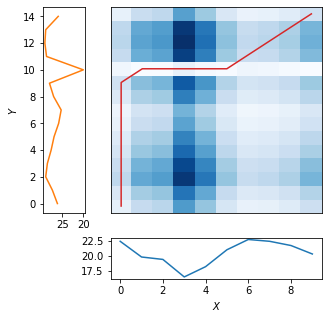

In [33]:
# 各フレーム間の対応付けを表すパス（赤線）は，以下の３つの制約条件を満たす
# また，制約条件を満たす中で，パス上のコストが最小になる
# 境界条件：両端が左下と右上にあること
# 単調生：左下から始まり，右，上，右上のいずれかにしか進まないこと
# 連続性：繋がっていること
plot_path([np.array(path)], X, Y, D)

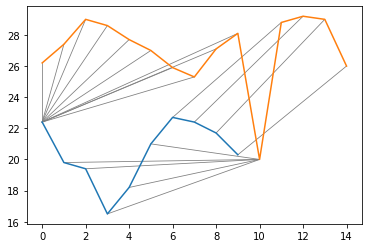

In [34]:
for line in path:
    plt.plot(line, [X[line[0]], Y[line[1]]], linewidth=0.8, c="gray")
plt.plot(X)
plt.plot(Y)
plt.show()

In [20]:
# 部分一致DTW SPRING
# SPRINGでは，DTWの動的計画法を一部修正する
# 境界条件：下の一列のどこかのマスと上の一列のどこかのマスを通る
# 変更点①：一番下の行の累積コストを，横のコストに足していくのではなくそのマス自身のコストにするよう変更
# 変更点②：アルゴリズム：また，終了地点を右上のマスから，一番上の行のどこかのマスに変更

def dist(x, y):
    return (x - y)**2

def get_min(m0, m1, m2, i, j):
    if m0 < m1:
        if m0 < m2:
            return i - 1, j, m0
        else:
            return i - 1, j - 1, m2
    else:
        if m1 < m2:
            return i, j - 1, m1
        else:
            return i - 1, j - 1, m2

def partial_dtw(x, y):
    Tx = len(x)
    Ty = len(y)

    C = np.zeros((Tx, Ty))
    B = np.zeros((Tx, Ty, 2), int)

    C[0, 0] = dist(x[0], y[0])
    for i in range(Tx):
        # 変更点①：一番下の行のコストは，そのマス自身のコストのみにする
        C[i, 0] = dist(x[i], y[0])
        B[i, 0] = [0, 0]

    for j in range(1, Ty):
        C[0, j] = C[0, j - 1] + dist(x[0], y[j])
        B[0, j] = [0, j - 1]

    for i in range(1, Tx):
        for j in range(1, Ty):
            pi, pj, m = get_min(C[i - 1, j],
                                C[i, j - 1],
                                C[i - 1, j - 1],
                                i, j)
            C[i, j] = dist(x[i], y[j]) + m
            B[i, j] = [pi, pj]
    # 一番上の行の一番コストが小さいマスのインデックスを保持
    t_end = np.argmin(C[:,-1])
    cost = C[t_end, -1]
    
    path = [[t_end, Ty - 1]]
    i = t_end
    j = Ty - 1

    while (B[i, j][0] != 0 or B[i, j][1] != 0):
        path.append(B[i, j])
        i, j = B[i, j].astype(int)
        
    return np.array(path), cost

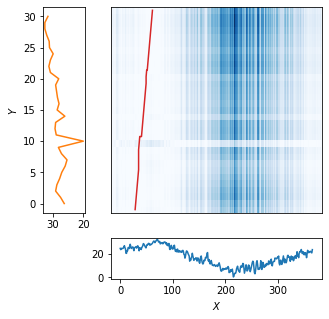

In [21]:
path, cost = partial_dtw(data, input_data)
D = (np.array(data).reshape(1, -1) - np.array(input_data).reshape(-1, 1))**2
plot_path([np.array(path)], data, input_data, D)

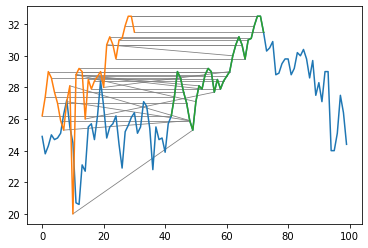

In [22]:
for line in path:
    plt.plot(line, [data[line[0]], input_data[line[1]]], linewidth=0.8, c="gray")
# plt.plot(data)
# ポスター用に長さ調整（メモ6/23）
plt.plot(data[:100])
plt.plot(input_data)
plt.plot(path[:,0], data[path[:,0]], c="C2")
plt.show()

In [23]:
# 複数の区間の検出
# DTW距離がε以下の部分時系列を複数検出する

# DTW距離がε以下の部分時系列の区間が重複している場合が考えられるが
# この場合，重複するもののうち，最もDTW距離が小さいものを1つ検出する

# 各マスを通る最小コストのパスの区間の開始地点をそれぞれのマスで記録

# SPRINGでは，今後観測されるXに検出した区間と重複し，
# かつ，DTW距離が検出した区間よりも小さい区間が存在しないことを保証する

# DTW距離がepsilon以下の部分時系列を検出
def spring(x, y, epsilon):
    Tx = len(x)
    Ty = len(y)

    # C:各マスの累積コスト，　B：最小コストの行/列番号， S:コスト最小のパスの開始位置
    C = np.zeros((Tx, Ty))
    B = np.zeros((Tx, Ty, 2), int)
    S = np.zeros((Tx, Ty), int)

    C[0, 0] = dist(x[0], y[0])

    # 一番左の列は，真っ直ぐ上にコストが累積される
    for j in range(1, Ty):
        C[0, j] = C[0, j - 1] + dist(x[0], y[j])
        B[0, j] = [0, j - 1]
        S[0, j] = S[0, j - 1]
        
    for i in range(1, Tx):
        # 一番下の列のコストは，そのマス自身のコストのみにする
        C[i, 0] = dist(x[i], y[0])
        B[i, 0] = [0, 0]
        # スタート地点の行番号を保持
        S[i, 0] = i
        
        # 上方向にコストを計算
        for j in range(1, Ty):
            pi, pj, m = get_min(C[i - 1, j],
                                C[i, j - 1],
                                C[i - 1, j - 1],
                                i, j)
            C[i, j] = dist(x[i], y[j]) + m
            B[i, j] = [pi, pj]
            # スタート地点の行番号を保持
            S[i, j] = S[pi, pj]
            
        # 最小のDTW距離の終点の行番号
        imin = np.argmin(C[:(i+1), -1])
        
        # 最小のDTW距離
        dmin = C[imin, -1]
        
        # dminがepsilonより大きければ抜ける
        if dmin > epsilon:
            continue
                
        for j in range(1, Ty):
            # コストがdminより小さいかつ,区間が被る場合は，
            # dminは最小コストではなくなるため次へ
            if (C[i,j] < dmin) and (S[i, j] < imin):
                break
                
        else:
            path = [[imin, Ty - 1]]
            temp_i = imin
            temp_j = Ty - 1
            
            while (B[temp_i, temp_j][0] != 0 or B[temp_i, temp_j][1] != 0):
                path.append(B[temp_i, temp_j])
                temp_i, temp_j = B[temp_i, temp_j].astype(int)
                
            C[S <= imin] = 100000000
            yield np.array(path), dmin

<ipython-input-30-2fa3d00c3ea1>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


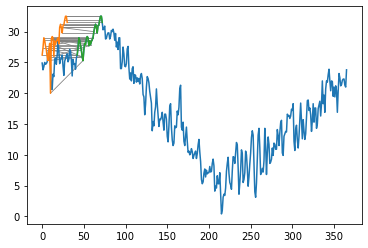

[72 71 70 69 68 67 66 65 64 63 62 61 61 60 59 58 57 56 55 54 53 52 51 50
 49 48 48 48 48 47 46 45 44 43 42]
[[31.5]
 [32.5]
 [32.5]
 [31.9]
 [31.1]
 [31. ]
 [29.8]
 [30.7]
 [31.2]
 [30.7]
 [30. ]
 [29. ]
 [29. ]
 [28.7]
 [28.4]
 [27.9]
 [28.5]
 [27.7]
 [29. ]
 [29.2]
 [28.8]
 [27.9]
 [28.1]
 [27.1]
 [25.3]
 [25.9]
 [25.9]
 [25.9]
 [25.9]
 [27. ]
 [27.7]
 [28.6]
 [29. ]
 [27.4]
 [26.2]]


In [30]:
pathes = []
for path, cost in spring(data, input_data, 80):
    for line in path:
        plt.plot(line, [data[line[0]], input_data[line[1]]], linewidth=0.8, c="gray")
    plt.plot(data)
    plt.plot(input_data)
    plt.plot(path[:,0], data[path[:,0]], C="C2")
    plt.show()
    pathes.append(path)
    # 一致している箇所のインデックス
    print(path[:,0])

In [25]:
path, cost = partial_dtw(data, input_data)
D = (np.array(data).reshape(1, -1) - np.array(input_data).reshape(-1, 1))**2
plot_path(pathes, data, input_data, D)

NameError: name 'pathes' is not defined

In [ ]:
# 二次元のデータを時系列データとするために，距離計算を二次元に拡張をおこなう
# twoDimentionalDtw.jpynb

In [39]:
# sin cos 確認用

In [63]:
sin1 = []
cos1 = []
x1 = []
for i in range(360 + 1):
    sin1.append(np.sin(np.radians(i)))
    cos1.append(np.cos(np.radians(i)))
    x1.append(i)

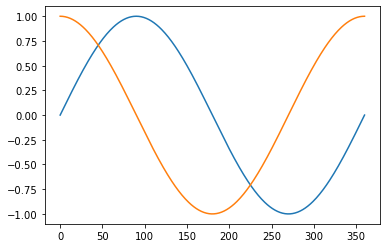

In [64]:
plt.plot(x1, sin1)
plt.plot(x1, cos1)

In [65]:
path1, dtw_dist1, C1 = dtw(sin1, cos1)

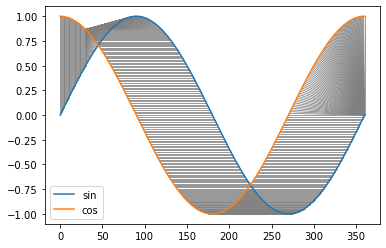

DTW距離: 63.4249620736901


In [71]:
for line in path1:
    plt.plot(line, [sin1[line[0]], cos1[line[1]]], linewidth=0.8, c="gray")
plt.plot(sin1, label="sin")
plt.plot(cos1, label="cos")
plt.legend()
plt.show()
print("DTW距離: " + str(dtw_dist1))

In [72]:
sin2 = []
cos2 = []
x2 = []
for i in range(720 + 1):
    sin2.append(np.sin(np.radians(i)))
    cos2.append(np.cos(np.radians(i)))
    x2.append(i)

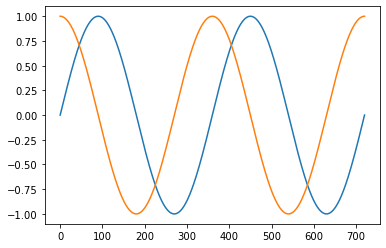

In [73]:
plt.plot(x2, sin2)
plt.plot(x2, cos2)

In [76]:
path2, dtw_dist2, C2 = dtw(sin2, cos2)

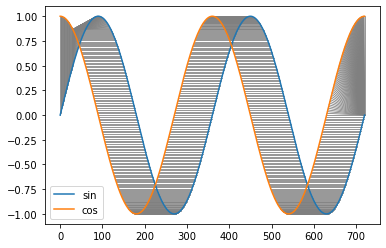

DTW距離: 63.42496207369011


In [78]:
for line in path2:
    plt.plot(line, [sin2[line[0]], cos2[line[1]]], linewidth=0.8, c="gray")
plt.plot(sin2, label="sin")
plt.plot(cos2, label="cos")
plt.legend()
plt.show()
print("DTW距離: " + str(dtw_dist2))

In [88]:
sin3 = []
cos3 = []
x3_s = []
x3_c = []
for i in range(360 + 1):
    sin3.append(np.sin(np.radians(i)))
    x3_s.append(i)
    
for j in range(360 + 1):
    cos3.append(np.cos(np.radians(j - 30)))
    x3_c.append(j - 30)

In [89]:
path3, dtw_dist3, C3 = dtw(sin3, cos3)

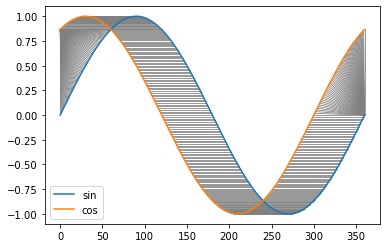

DTW距離: 31.324377924288733


In [92]:
for line in path3:
    plt.plot(line, [sin3[line[0]], cos3[line[1]]], linewidth=0.8, c="gray")
plt.plot(sin3, label="sin")
plt.plot(cos3, label="cos")
plt.legend()
plt.show()
print("DTW距離: " + str(dtw_dist3))

In [ ]:
sin4 = []
cos4 = []
x4_s = []
x4_c = []
for i in range(360 + 1):
    sin4.append(np.sin(np.radians(i)))
    x4_s.append(i)
    
for j in range(360 + 1):
    cos4.append(np.cos(np.radians(j)))
    x4_c.append(j)